<a href="https://colab.research.google.com/github/param1896/plugin-GUI/blob/master/CINC_Data_Loader_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


!pip install wfdb==2.2.1
import wfdb
import wfdb.processing

    100% |████████████████████████████████| 102kB 3.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/bb/a9/00/0078d26b0c15b31be0001af8eb659496709c361c69641303f1
Successfully built wfdb


The QRS complex detector and heart rate computer built into the wfdb data loader works for some data points, but returns "interesting" results for others

In [0]:
50000 / len(record.p_signal)

NameError: ignored

0.39821338653564453
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
10.381223201751709
10.512442111968994


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less_equal


10.68502950668335


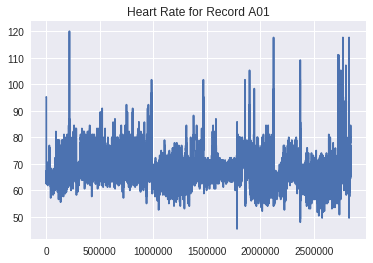

In [0]:

import time
start = time.time()
#downloads record from physionet into python (https://wfdb.readthedocs.io/en/latest/wfdb.html)
record = wfdb.rdrecord('a20', pb_dir='apnea-ecg')
print(time.time() - start)


cf = wfdb.processing.XQRS.Conf(hr_init=75,
                                     hr_max=200,
                                     hr_min=25,
                                     qrs_width=0.1,
                                     qrs_thr_init=0.7, #0.13,
                                     qrs_thr_min=0.5,
                                     ref_period=0.3,
                                     t_inspect_period=0.36)

#https://wfdb.readthedocs.io/en/latest/processing.html
N = len(record.p_signal)
#algorithm that detects location of qrs complex in raw ecg data
signal = record.p_signal
qrs_inds = wfdb.processing.xqrs_detect(sig=signal[:,0],
                                       fs = record.fs,
                                       sampfrom=0, 
                                       sampto=N,
                                       conf=cf)

#print qrs_inds

print(time.time() - start)
#computes heartrate from qrs indices
hr = wfdb.processing.compute_hr(sig_len=N, qrs_inds=qrs_inds, fs=record.fs)
print(time.time() - start)

hr_top = hr[hr <= 120]
hr_bot = hr_top[hr_top > 40]
plt.plot(hr_bot) #&& hr > 40])

plt.title("Heart Rate for Record A01")
print(time.time() - start)


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


Text(0.5, 1.0, 'Heart Rate for Record A06')

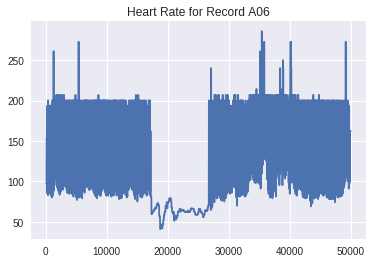

In [0]:

#https://wfdb.readthedocs.io/en/latest/wfdb.html

#loads record in from memory
record = wfdb.rdrecord('a06', pb_dir='apnea-ecg')


#https://wfdb.readthedocs.io/en/latest/processing.html


N = 50000
#algorithm that detects qrs peaks
signal = record.p_signal
qrs_inds = wfdb.processing.xqrs_detect(sig=signal[:,0],
                                       fs = record.fs,
                                       sampfrom=0, 
                                       sampto=N)
#computes heartrate from qrs indices
hr = wfdb.processing.compute_hr(sig_len=N, qrs_inds=qrs_inds, fs=record.fs)
plt.plot(hr)
plt.title("Heart Rate for Record A06")

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


Text(0, 0.5, 'IHR (BPM)')

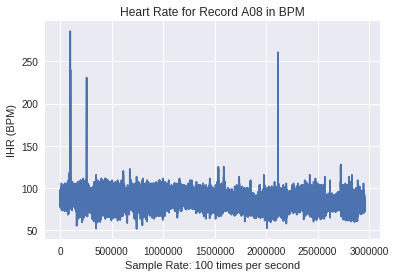

In [0]:
#https://wfdb.readthedocs.io/en/latest/wfdb.html
#loads record in from memory
record = wfdb.rdrecord('a08', pb_dir='apnea-ecg')
#https://wfdb.readthedocs.io/en/latest/processing.html
#algorithm that detects qrs peaks
signal = record.p_signal
qrs_inds = wfdb.processing.xqrs_detect(sig=signal[:,0],
                                       fs = record.fs,
                                       sampfrom=0, 
                                       sampto=N)
#computes heartrate from qrs indices
hr = wfdb.processing.compute_hr(sig_len=N, qrs_inds=qrs_inds, fs=record.fs)
plt.plot(hr)
plt.title("Heart Rate for Record A08 in BPM")
plt.xlabel("Sample Rate: 100 times per second")
plt.ylabel("IHR (BPM)")
